## Midwest Traffic Accidents k-means Clustering

### Contents

#### 01 Import Libraries and Data
#### 02 Elbow Technique
#### 03  k-means Clustering

### 01 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# Display graphs in notebook
%matplotlib inline

In [3]:
# Create path variable for main project folder
path = r'D:\JupyterProjects\09-2022 Midwest Accidents Analysis'

In [4]:
# Import accidents data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'MidwestCleanUpdated.csv'), index_col = False)

In [5]:
df.shape

(279223, 21)

In [6]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,State,Temperature(F),Pressure(in),Visibility(mi),...,Year,Date,Day,Month,Day_of_Week,Hour,Weekday,Weekend,State_Accidents,Day Category
0,3,40.108910,-83.092860,3.230,R,Dublin,OH,42.1,29.76,10.0,...,2016,2016-02-08,8,2,0,0,1.0,0.0,23725,Weekday
1,2,39.865420,-84.062800,0.747,R,Dayton,OH,36.9,29.68,10.0,...,2016,2016-02-08,8,2,0,5,1.0,0.0,23725,Weekday
2,2,39.102660,-84.524680,0.055,R,Cincinnati,OH,36.0,29.70,10.0,...,2016,2016-02-08,8,2,0,6,1.0,0.0,23725,Weekday
3,2,41.062130,-81.537840,0.123,R,Akron,OH,39.0,29.65,10.0,...,2016,2016-02-08,8,2,0,6,1.0,0.0,23725,Weekday
4,3,39.172393,-84.492792,0.500,R,Cincinnati,OH,37.0,29.69,10.0,...,2016,2016-02-08,8,2,0,7,1.0,0.0,23725,Weekday


In [7]:
# Exclude categorical variables
df = df[['Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Pressure(in)','Visibility(mi)',
         'Weekday','Weekend','Day_of_Week','Hour']]

### 02 Elbow Technique

In [8]:
# Define the range of potential clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]  # Defines k-means clusters in the range assigned above

In [9]:
# Create score to represent rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-180075452.72931546,
 -64180710.750623666,
 -43304871.06869295,
 -33129833.889655042,
 -28671106.110255487,
 -26047337.1268673,
 -23795666.156457853,
 -22158423.100319125,
 -20823877.68634972]

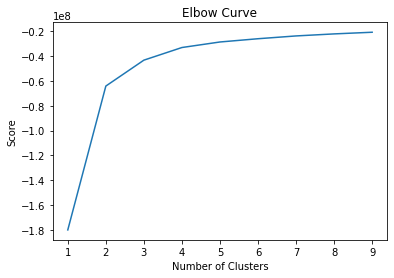

In [10]:
# Plot elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from 1 to 2 with slight increases after that from 2 to 3 and 3 to 4 on the x-axis.  After that, the curve mostly flattens out. It appears that the optimal count for clusters is four.

### 03 k-means Clustering

In [11]:
# Create k-means object
kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit the k-means object to the data
kmeans.fit(df)

KMeans(n_clusters=4)

In [13]:
df['Clusters'] = kmeans.fit_predict(df)

In [14]:
df.head(10)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Pressure(in),Visibility(mi),Weekday,Weekend,Day_of_Week,Hour,Clusters
0,3,40.108910,-83.092860,3.230,42.1,29.76,10.0,1.0,0.0,0,0,1
1,2,39.865420,-84.062800,0.747,36.9,29.68,10.0,1.0,0.0,0,5,1
2,2,39.102660,-84.524680,0.055,36.0,29.70,10.0,1.0,0.0,0,6,1
3,2,41.062130,-81.537840,0.123,39.0,29.65,10.0,1.0,0.0,0,6,1
4,3,39.172393,-84.492792,0.500,37.0,29.69,10.0,1.0,0.0,0,7,1
5,2,39.063240,-84.032430,1.427,35.6,29.66,10.0,1.0,0.0,0,8,1
6,2,39.775650,-84.186030,0.227,33.8,29.63,3.0,1.0,0.0,0,8,1
7,2,41.375310,-81.820170,0.521,33.1,29.63,0.5,1.0,0.0,0,11,1
8,2,40.702247,-84.075887,0.491,39.0,29.59,10.0,1.0,0.0,0,14,1
9,2,40.109310,-82.968490,0.826,32.0,29.59,0.5,1.0,0.0,0,15,1


In [15]:
df['Clusters'].value_counts()

1    86625
0    80275
2    73438
3    38885
Name: Clusters, dtype: int64

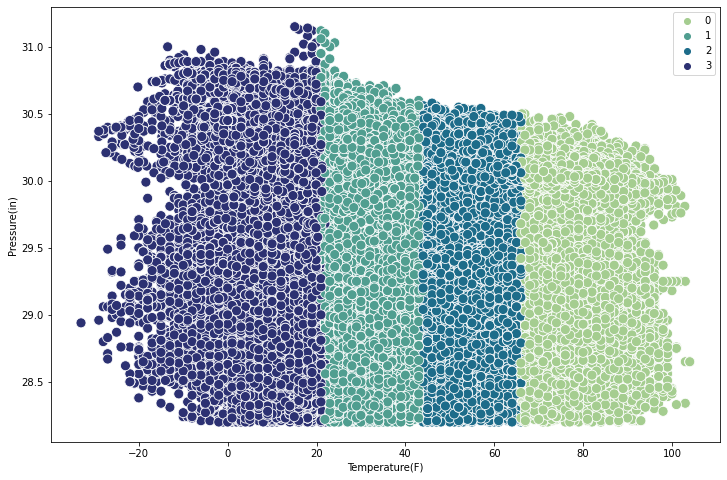

In [16]:
# Plot clusters for "Temperature(F)" and "Pressure(in)"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Temperature(F)'], y=df['Pressure(in)'], hue=kmeans.labels_, s=100, palette="crest") 

ax.grid(False) 
plt.xlabel('Temperature(F)')
plt.ylabel('Pressure(in)')
plt.show()

This plot shows the clustering by temperature.

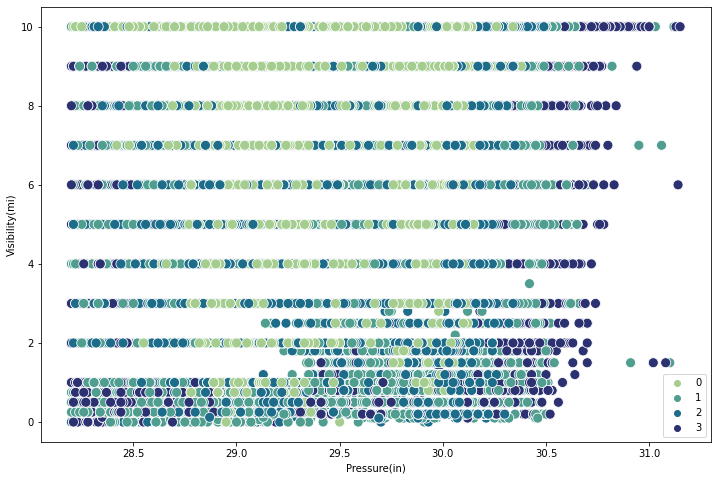

In [17]:
# Plot clusters for "Pressure(in)" and "'Visibility(mi)'"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Pressure(in)'], y=df['Visibility(mi)'], hue=kmeans.labels_, s=100, palette="crest") 

ax.grid(False) 
plt.xlabel('Pressure(in)')
plt.ylabel('Visibility(mi)')
plt.show()

These clusters are mixed.  The light green (0) data points around the 28 inch pressure mark at low visibility (0-1 miles) occur in the freezing temperatures range with precipitation no doubt contributing to the low visibility.   

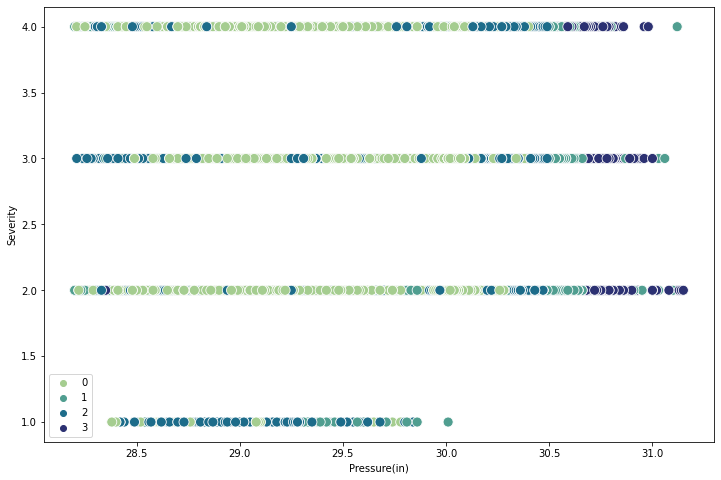

In [18]:
# Plot clusters for the 'Pressure(in)' and 'Severity'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Pressure(in)'], y=df['Severity'], hue=kmeans.labels_, s=100, palette="crest")

ax.grid(False) 
plt.xlabel('Pressure(in)') 
plt.ylabel('Severity') 
plt.show()

The clusters are also very mixed.  Overall, this indicates that accidents of all severity levels occur over a range of pressures.   

In [19]:
df.loc[df['Clusters'] == 3, 'Cluster'] = 'navy'
df.loc[df['Clusters'] == 2, 'Cluster'] = 'teal'
df.loc[df['Clusters'] == 1, 'Cluster'] = 'green'
df.loc[df['Clusters'] == 0, 'Cluster'] = 'light green'

In [20]:
df.groupby('Cluster').agg({'Severity':['mean', 'median'],
                         'Distance(mi)':['mean', 'median'], 
                         'Temperature(F)':['mean', 'median'],
                         'Visibility(mi)':['mean', 'median'],
                         'Day_of_Week':['mean', 'median'],  
                         'Hour':['mean', 'median']})

Severity        Distance(mi)        Temperature(F)         \
                 mean median         mean median           mean median   
Cluster                                                                  
green        2.288820    2.0     0.835292  0.369      32.631887   32.0   
light green  2.352401    2.0     0.781593  0.389      76.903594   76.0   
navy         2.161759    2.0     0.909119  0.386      10.258894   12.0   
teal         2.345148    2.0     0.740124  0.370      54.688891   55.0   

            Visibility(mi)        Day_of_Week              Hour         
                      mean median        mean median       mean median  
Cluster                                                                 
green             7.907009   10.0    2.753859    3.0  12.331694   13.0  
light green       9.588485   10.0    2.583694    3.0  13.920050   15.0  
navy              7.604120   10.0    2.550649    2.0  11.891038   12.0  
teal              9.033009   10.0    2.618876    3.0  12.495370   13.0

The clusters are clearly grouped by temperature which has the broadest range of values in the data.  Most accidents have a severity of 2 with a slightly higher mean for warmer temperatures when there are likely more drivers on the road.  Mean distance is slightly higher at lower temperatures, perhaps when roads are more slippery.  Mean visibility is highest for the warmer temperature clusters.  Day of week and hour indicate that most accidents occur on weekdays and average between rush hours.  Time series analysis will be very useful on this data as well as an evaluation of categorical data in Tableau.  